Pri reševanju te naloge se trudi programirati čim manj. Seveda ne tako, da prepustiš delo drugim :), pač pa naj bodo razredi smiselno izpeljani eden iz drugega in naj ne ponavljajo kode, ki jo lahko nadomestijo metode starševskih razredov.

Pred reševanjem preberi celotno nalogo, da ne boš pri nalogi za oceno 7 ali 8 spreminjal tega, kar si naredil za 6. Kateri razred bo izpeljan iz katerega, se odloči sam. Vrstni red opisov v nalogi ne implicira nujno hierarhije razredov.

Atribute imenuj, kakor želiš. Po mili volji smeš dodajati tudi svoje metode (tako kot smo na predavanjih dodali želvi metodo `update`). Pač pa avtor naloge (= jaz) ne vidi potrebe, da bi vsak razred definiral svoje metode `prevozi`, `lokacija`, `razdalja`, `pot` in `obiskana_polja`: te definiraj le v osnovnem razredu. Početi torej smeš kar želiš, dokler bodo vse metode počele vse, kar zahteva naloga, in bo tvoj izdelek prestal teste.

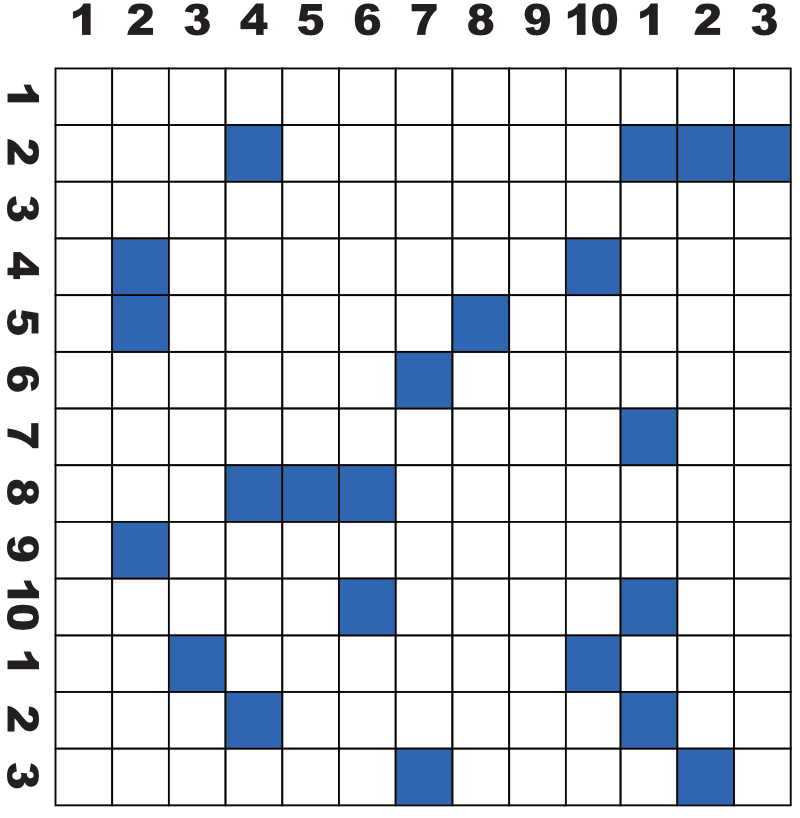

## Ocena 6

- Napiši razred `Kolesar`.

  - Konstruktor `__init__(self, vrstica, stolpec, zemljevid)` kot argument prejme začetni koordinati kolesarja in množico koordinat ovir, podanih s terkami `(vrstica, stolpec)`.
  
      Primer na sliki je opisan z množico
 
      ```
    {(2, 4), (2, 11), (2, 12), (2, 13),
     (4, 2), (4, 10),
     (5, 2), (5, 8),
     (6, 7),
     (7, 11),
     (8, 4), (8, 5), (8, 6),
     (9, 2),
     (10, 6), (10, 11),
     (11, 3), (11, 10),
     (12, 4), (12, 11),
     (13, 7), (13, 12)}
    ```

    Kako dodati konstruktorju argumente, smo videli na predavanju, v zapiskih pa to najdeš takoj na začetku [zapiskov naslednjega tedna](https://github.com/janezd/predavanja/blob/master/p1/predavanja/12b%20objektno%20programiranje%20-%20dedovanje.ipynb).

  - `premik(self, smer)` prejme smer `"<"`, `">"`, `"^"` ali `"v"`. Metoda premakne kolesarja za en kvadratek v podano smer, če tam ni ovire. Če se na ciljnem kvadratku nahaja ovira, pa kolesar ne spremeni pozicije, temveč obleži, kjer je in se poslej ne odziva več na nadaljnje ukaze `premik` ali `pojdi`.

  - `prevozi(self, pot)` prejme niz z zaporedjem premikov. V nizu se izmenjujejo števke (= enomestna števila) in smeri. Tako, na primer, `"3>1v2^4^"` pomeni tri korake desno, enega dol, 2 gor in potem še štiri gor. Funkcija mora izvesti vse podane korake do konca ali do trenutka, ko se kolesar zaleti v oviro.

    Recimo, da kolesar izvaja `"3>"`,  tri korake desno. Rezultat mora biti ekvivalenten temu, da trikrat izvede premik `>`. Če je že takoj desno od njega ovira, obleži še preden se začne premikati. Če pa je desno eno prazno polje in nato ovira, se zapelje na to, prazno polje in ustavi.

  - `lokacija()` vrne trenutne koordinate kolesarja v obliki terke `(vrstica, stolpec)`.

### Rešitev

Da bo rešitev lažja, bomo nalogi za oceni 6 in 7 najprej reševali, kot da ni nalog za višje ocene. Kasneje bomo obrnili vse na glavo.

In [4]:
class Kolesar:
    def __init__(self, vrstica, stolpec, zemljevid):
        self.vrstica = vrstica
        self.stolpec = stolpec
        self.zemljevid = zemljevid
        self.ziv = True

    def lokacija(self):
        return self.vrstica, self.stolpec
        
    def premik(self, smer):
        if not self.ziv:
            return
        v = self.vrstica + {"v": 1, "^": -1}.get(smer, 0)
        s = self.stolpec + {"<": -1, ">": 1}.get(smer, 0)
        if (v, s) in self.zemljevid:
            self.ziv = False
        else:
            self.vrstica = v
            self.stolpec = s

    def prevozi(self, pot):
        for razdalja, smer in zip(pot[::2], pot[1::2]):
            for _ in range(int(razdalja)):
                self.premik(smer)

**Konstruktor** si zapomni podane argumente in zabeleži, da je kolesar živ.

**Lokacija** vrne trenutne koordinate.

**Premik** pusti neživega kolesarja ležati, kjer leži. Za ostale ugotovi, kam ga bo pripeljal premik. To bi se dalo narediti s kupom `if`-ov, recimo tako:

```
    v, s = self.vrstica, self.stolpec
    if smer == "v":
        v += 1
    if smer == "^":
        v -= 1
```

... in tako naprej. Lahko bi uporabili tudi `match`, a ne bi bilo nič krajše. Tule smo raje uporabili slovar, je bolj zabavno.

```
    v = self.vrstica + {"v": 1, "^": -1}.get(smer, 0)
```

Če je `smer` `"v"`, se vrstica poveča za 1; če je `smer`, `"^"`, se zmanjša za 1. Če je smer kaj drugega, bo `get` vrnil `0` in vrstica se ne bo spremenila. Enako za stolpec.

Ko vemo, kam nas pripelje premik, preverimo, ali je tam ovira in se odločimo, ali bo kolesar obležal ali bo šel tja.

**Prevozi** vzame vse sode in vse lihe znake niza. Zazipa jih skupaj; prvi so razdalje, drugi smeri. Potem ustreznokrat pokliče `self.premik`.

## Ocena 7

Dodaj naslednje metode.

  - `razdalja()` vrne razdaljo (v številu) kvadratkov, ki jih je doslej (oz. do nesreče) prevozil kolesar.
  - `obiskana_polja()` vrne množico koordinat polj, ki jih je obiskal kolesar. Obiskana polja vključujejo tudi začetno polje. Pazi: razdalja ni nujno enaka številu obiskanih polj (+1, za začetno polje), saj se lahko polja ponavljajo, v množici pa nastopajo le enkrat!
  - `pot()` vrne prevoženo pot v obliki, v kakršni jo sprejema metoda `prevozi`.

    Rezultat funkcije `pot` naj bo zapisana strnjeno. Recimo, da kolesarka `ana` prevozi takšno pot:

    ```python
    ana = Kolesar(2, 2, zemljevid)
    ana.premik(">")
    ana.premik(">")
    ana.prevozi("2>")
    ana.prevozi("8v")
    ana.prevozi("4v")
    ana.premik(">")
    ```
    
    Po tem zaporedju klicev mora `ana.pot()` vrniti `"4>9v3v1>"`.

    - Prvi trije klici (oba `premik` in še en `prevozi`) so shranjeni v `4>`.  
    - 12 premikov v smeri navzdol ni zapisanih kot `12v`, ker morajo biti vsa števila enomestna, zato se shrani `9v` in nato `3v`.

    Nasvet: niz s potjo sestavljaj sproti, med premikanjem, tako da "popravljaš" njegov konec in dodajaš, kadar je potrebno.

#### Rešitev

Potrebno bo dopolniti konstruktor, da bo dodal dva atribute in dodati tri nove metode, ki bodo trivialne. Glavno delo bomo opravili v `premik`u.

In [5]:
class Kolesar:
    def __init__(self, vrstica, stolpec, zemljevid):
        self.vrstica = vrstica
        self.stolpec = stolpec
        self.zemljevid = zemljevid
        self.ziv = True

        self.obiskano = {(vrstica, stolpec)}
        self.prevozeno = ""

    def lokacija(self):
        return self.vrstica, self.stolpec

    def pot(self):
        return self.prevozeno

    def razdalja(self):
        return sum(int(i) for i in self.prevozeno[::2])

    def obiskana_polja(self):
        return self.obiskano

    def premik(self, smer):
        if not self.ziv:
            return
        v = self.vrstica + {"v": 1, "^": -1}.get(smer, 0)
        s = self.stolpec + {"<": -1, ">": 1}.get(smer, 0)
        if (v, s) in self.zemljevid:
            self.ziv = False
        else:
            self.vrstica = v
            self.stolpec = s
            self.obiskano.add((v, s))
            if self.prevozeno and self.prevozeno[-1] == smer and int(self.prevozeno[-2]) < 9:
                self.prevozeno = self.prevozeno[:-2] + str(int(self.prevozeno[-2]) + 1) + smer
            else:
                self.prevozeno += "1" + smer

    def prevozi(self, pot):
        for razdalja, smer in zip(pot[::2], pot[1::2]):
            for _ in range(int(razdalja)):
                self.premik(smer)

`obiskano` bo množica obiskanih polj (v začetku vsebuje začetno polj) in `prevozeno` bo to, kar naj bi vračala metoda `pot` (v začetku prazen niz). Edina "zapletena" metoda je `razdalja`, ki prešteje vse opravljene premike. Tudi to bi brez težav poenostavili, če bi dodali še en atribut, v katerem bi bila zapisana razdalja.

Glavno delo, kot obljubljeno, opravi `premik`. Ta po novem doda polje `(v, s)` med obiskana polja, nato pa dopolni prevoženo pot. Če je ta neprazna in je bil zadnji premik opravljen v enaki smeri kot ta in število teh premikov še ni 9, spremenimo `prevozeno` tako, da zamenjamo zadnjo številko s številko, ki je za 1 večja. Sicer zabeležimo, da smo se premaknili za `1` v podano smer. Za primer recimo, da se premikamo v smer `>`.

- Če je `self.prevozeno` prazen niz, bomo padli pod `else` in v `self.prevozeno` "dodali" `"1>"`.
- Če je `self.prevozeno`, recimo `"4>1^2v"`, potem ne drži, da je `self.prevozeno[-1] == smer`, torej pademo v `else` in `self.prevozeno` postane `"4>1^2v1>"`.
- Če je `self.prevozeno`, `"4>1^9>"`, potem ne drži, da je `int(self.prevozeno[-2]) < 9`:, torej spet pademo v `else` in `self.prevozeno` postane `"4>1^9>1>"`. (Pogoj bi lahko zapisali tudi kot `self.prevozeno[-2] < "9"`, saj vemo, da je `self.prevozeno[-2]` niz dolžine en znak.)
- Končno, če je `"4>1^5>"`, ga razmontiramo: vzamemo vse znake razen zadnjih dveh, `self.prevozeno[:-2]`, to je `"4>1^"`. Dodamo za 1 povečano številko, ki jo dobimo tako, da `self.prevozeno[-2]` pretvorimo v število, prištejemo 1 in nazaj v niz. Nato dodamo še smer. Tako dobimo `"4>1^6>"`

Seveda to ni edina možna rešitev. Namesto nizov bi lahko, recimo, shranjevali terke `(razdalja, smer)` in bi jih metoda `pot` sestavila v niz.

**Medklic glede atributov in "enega vira resnice".** Tule imamo dilemo: kaj shranjevati. V neki obliki - kot niz ali kot nekakšen seznam ali celo kot zaporedje premikov - moramo shraniti pot. To že zadošča, da lahko izračunamo razdaljo in tudi obiskana polja, torej ni potrebe, da shranjujemo še `obiskano`. Ne le, da ni potrebe; nekateri pogledi pravijo, da tega pravzaprav ne smemo, ker krši načelo o enem samem viru resnice ([Single source of truth](https://en.wikipedia.org/wiki/Single_source_of_truth)). Kot programerji se boste s tem srečali v okoljih, kot je React. En sam vir resnice je v resnici odlična ideja. Če lahko do iste informacije pridemo iz dveh virov, se lahko zgodi, da ne bosta konsistentna. No, programerjev problem je predvsem v tem, da mora vzdrževati dva vira informacij -- v našem primeru mora `premik` zapisovati tako obiskana polja kot pot. Če bi se odločili, da bomo tudi razdaljo shranjevali, bi moral skrbeti še zanjo.

Zakaj smo se potem tu odločili (pravzaprav: zakaj sem se tu odločil :) shranjevati obiskana polja, čeprav bi jih lahko izračunal iz poti. Iz praktičnih razlogov. Če bi hotel iz poti rekonstruirati obiskana polja, bi moral pravzaprav ponoviti vse premike. Enako za razdaljo. Še hujše: tudi trenutno lokacijo kolesarja lahko izračunam iz shranjene poti, torej bi celo metoda `lokacija`, če bi šel čisto po pravilih, vsakič znova računala, kje se nahaja kolesar, namesto da bi to prebrala iz `self.vrstica` in `self.stolpec`.

Da, če bi hotel slediti ideji enega vira resnice, bi kolesar shranjeval le **začetni** koordinati in zemljevid ter opravljeno pot. Niti tega, ali je živ, si ne bi zapomnil.

To je očitno ekstremno, zato sem ubral srednjo, praktičnejšo pot.

## Ocena 8

- Napiši razred `Duh`. Ta je podoben razredu `Kolesar`, vendar zna voziti skozi ovire, kot da jih ni: če se zapelje na polje z oviro, se **v isti potezi** znajde na drugi strani. Če se zaleti v serijo ovir, gre v isti potezi skoznje.

    - `Duh`, ki se na gornji sliki nahaja na `(9, 4)` bo po premiku v smeri `^` na polju `(7, 4)`. Pri tem se šteje, da je prevozil dve polji - vključno z oviro: obiskana polja so `{(9, 4), (8, 4), (7, 4)}`, metoda `pot()` pa vrne `2^` (ne `"1^"`).
    - `Duh`, ki se nahaja na `(8, 2)` bo po premiku `4>` na polju `(8, 9)` (in ne `(8, 6)` ali `(8, 7)`). Polja z ovirami zanj preprosto "ne štejejo", upoštevajo pa se pri razdalji: s klicem `prevozi("4>")` ni prevozil 4 polj temveč 7 polj. (To pravilo je postavljeno tako, da bi bo program preprostejši - če se ga lotiš pametno.)

- Napiši tudi razred `Trdozivec`, ki je podoben razredu `Kolesar`, vendar bolj trdoživ. Njegov konstruktor prejme še en dodatni argument, `trdozivost`. Ta pove, v koliko ovir se mora kolesar zaleteti, da obleži. Če je `trdozivost` enaka 3, kolesar obleži, ko se zaleti tretjič. Premik v oviro se seveda nikoli ne izvede (trdoživec ni duh!); razlika med trdoživcem in softičem je samo v tem, da trdoživec ne obleži že pred prvo oviro.

    Pozor: če je ovira desno od kolesarja, klic `prevozi("3>")` povzroči, da se kolesar trikrat zaleti vanjo. Če je njegova trdoživost enaka 3 ali manj, obleži, če je 4 ali več, pa preživi.

- Napiši, končno, razred `Eksplozivec`. Temu ovire ne povzročajo prav nobene škode, pač pa jo on povzroči oviram: ovira, v katero se zaleti eksplozivec, izgine in eksplozivec se pomakne na to polje, kot da ovire tam sploh nikoli ne bilo.

    V nekem srečnem scenariju sta Ana (Eksplozivec) in Berta (Kolesar) začeli na polju 10, 2. Ana je šla gor. Za njo je šla gor še Berta -- in uspela, saj je Ana razstrelila oviro pred njo!

    Če nameravaš reševati tudi dodatno naloge, ovire odstranjuj iz zemljevida tako, da kličeš metodo `discard`.


### Rešitev

Tule bomo obrnili vse na glavo.

- Običajni `Kolesar` je samo `Trdozivec~, katerega trdoživost je `1` - obležal bo že po prvem trku.
- `Duh` je neskočno trdoživ; dogovorimo se, da bo njegova trdoživost -1; lahko bi jo nastavili tudi na neskončno, `inf`, vendar bomo malo packali in se bo to izkazalo za bolj praktično. `Duh` se bo od `Kolesarja` razlikoval po posebnem premiku.
- Tudi `Eksplozivec` je samo `Trdozivec` (lahko pa bi bil tudi `Kolesar`) s posebnim premikom.

Začnimo s `Trdozivec`.

In [ ]:
class Trdozivec:
    def __init__(self, vrstica, stolpec, zemljevid, trdozivost=-1):
        self.vrstica = vrstica
        self.stolpec = stolpec
        self.zemljevid = zemljevid
        self.trdozivost = trdozivost
        self.prevozeno = ""
        self.polja = {(vrstica, stolpec)}

    def lokacija(self):
        return self.vrstica, self.stolpec

    def razdalja(self):
        return sum(int(i) for i in self.prevozeno[::2])

    def pot(self):
        return self.prevozeno

    def obiskana_polja(self):
        return self.polja

    def premik(self, smer):
        if self.trdozivost == 0:
            return
        v = self.vrstica + {"v": 1, "^": -1}.get(smer, 0)
        s = self.stolpec + {"<": -1, ">": 1}.get(smer, 0)
        ovira = (v, s) in self.zemljevid
        if ovira and self.trdozivost > 0:
            self.trdozivost -= 1
        else:
            self._premik(v, s, smer)

    def _premik(self, v, s, smer):
            self.vrstica, self.stolpec = v, s
            self.polja.add((v, s))
            if self.prevozeno and self.prevozeno[-1] == smer and self.prevozeno[-2] < "9":
                self.prevozeno = self.prevozeno[:-2] + str(int(self.prevozeno[-2]) + 1) + smer
            else:
                self.prevozeno += "1" + smer

    def prevozi(self, pot):
        for razdalja, smer in zip(pot[::2], pot[1::2]):
            for _ in range(int(razdalja)):
                self.premik(smer)

Trdoživec je praktično enak prejšnjemu `Kolesar`. Konstruktur ima dodaten argument `trdozivost`. Ker nam bo prišlo prav, jo nastavimo na `-1`. (To ni lepo: v bistvu s tem `Kolesar` pripravlja teren za nek specifičen razred, `Duh`; boste videli.) Atribut `self.ziv` ukinemo, saj ga je nadomestila `trdozivost`; kolesar obleži, ko `trdozivost` pade na `0`.

Ostanek gre podobno kot prej. V začetku preverimo, ali je kolesar živ, s pogojem `self.trdozivost == 0`.

Kasneje naredimo nekaj grdega: kolesarju zmanjšamo trdoživost, če na polju ni ovire ali pa je njegova trdoživost enaka -1. S tem smo se že v osnovnem razredu odločili, da bo `trdozivost == -1` pomenila `Duh`-a. To je res res red grdo. V kozarec, v katerega vržem 20 centov vsakič, ko pokličem `index` ali `remove`, bom moral za to doplačati vsaj pet evrov.

Metoda `premik` kliče metodo `_premik`, ki v resnici premakne kolesarja. Tudi to bomo potrebovali kasneje.

Vse te grdobije se splačajo zato, ker so preostali razredi zdaj čisto preprosti.

In [ ]:
class Kolesar(Trdozivec):
    def __init__(self, vrstica, stolpec, zemljevid):
        super().__init__(vrstica, stolpec, zemljevid, 1)


class Duh(Trdozivec):
    def premik(self, smer):
        super().premik(smer)
        while (self.vrstica, self.stolpec) in self.zemljevid:
            super().premik(smer)

class Eksplozivec(Trdozivec):
    def premik(self, smer):
        v = self.vrstica + {"v": 1, "^": -1}.get(smer, 0)
        s = self.stolpec + {"<": -1, ">": 1}.get(smer, 0)
        self.zemljevid.discard((v, s))
        if not (v, s) in self.zemljevid:
            self._premik(v, s, smer)

`Kolesar` zamenja le konstruktor: `Kolesar` je skoraj skrajno netrdoživ trdoživec. (Še bolj netrdoživ bi bil le `Mrtvec`, katerega začetna trdoživost bi bila `0`.) `Kolesar`jev konstruktor torej pokliče podedovani konstruktor in mu doda `1` kot trdoživost.

`Duh` ne potrebuje konstruktorja, ker ima `Trdozivec` že primerno začetno vrednost. Njegov `premik` ga premakne (ker `Trdozivec` ne ubija kolesarjev s trdoživostjo -1, temveč jih mirno prestavi v oviro), in nato ga premika še naprej, dokler ne pride iz ovire.

`Eksplozivec` pa mora spremeniti `premik`. Izračuna nove koordinate (z malo ponavljanja kode, ampak za tole se ne bom kaznoval za več kot pet centov). Nato odstrani morebitno oviro na teh koordinatah. Če tam ni ovire, se premakne tja, pri čemer pokliče kar `_premik`.

## Ocena 9

Oddelek za gozdarsko dejavnost in motorni promet skliče izredno sejo, na kateri obravnava problem prevelike pretočnosti kolesarskih stez zaradi eksplozivno odstranjenih ovir. Na njem sklene in po hitrem postopku naroči trdnejše ovire. Nove ovire preživijo tri eksplozije. Eksplozivni kolesar vedno preživi trk (eksplozivni kolesar je na nek način neskončno trdoživ), vendar se ne premakne z mesta, dokler ovira ne eksplodira dovoljkrat.

Vzemimo, da je eksplozivni kolesar na polju (10, 2). Premik `"1^"` ali `"2^"` ga ne premakneta z mesta, temveč le načenjata oviro. Premik `"3^"` (oziroma, v splošnem trije trki v to oviro, ne glede na smer trka in čas, ki mine med njimi) bi jo res uničil in premaknil kolesarja na polje z oviro ((9, 2)). Če eksplozivni kolesar na polju (10, 2) izvede premik `"5^"`, se premakne na polje (7, 2): prva dva premika sta zgolj uničevala oviro, v tretjem, ki je uničil oviro, pa se je že prekamnil na (9, 2) (in v naslednjih dveh do (7, 2)).

Da poskrbiš za ta scenarij, pusti pri miru vse razrede s kolesarji (ob predpostavki, da so sprogramirani pravilno).

Pač pa napiši razred `Ovire`. Izpeljan naj bo iz razreda `dict`. Testi za dodatno nalogo bodo ponovno izvedli vse teste za obvezno nalogo (razen teh, ki vključujejo posebne efekte, se prvi eksplozije), a kot argument `zemljevid` namesto množice podali tvoj razred `Ovire`. Zato poskrbi, da boš v obvezni nalogi uporabljal množice tako, da bo delovala tudi, če bodo `Ovire` v resnici slovar. (Namig: razmisliti moraš, kaj bodo tvoji ključi.)

Če bo razred `Ovire` izpeljan iz razreda `dict`, zadošča, da definiraš

- konstruktor, ki prejme množico ovir,
- metodo `discard`, ki kot argument prejme koordinate ovire, vendar jo dejansko odstrani šele ob tretjem klicu. (Na tem mestu razmisli, kaj so vrednosti v tvojem slovarju.) Če na podanih koordinatah ni ovire, `discard` ne stori ničesar.

Tvoj slovar se mora torej vesti tako:

```python
>>> ovire = Ovire({(1, 1), (2, 4)})
>>> ovire.discard((1, 1))
>>> (1, 1) in ovire
True
>>> ovire.discard((2, 4))
>>> (2, 4) in ovire
True
>>> ovire.discard((1, 1))
>>> (1, 1) in ovire
True
>>> ovire.discard((1, 1))
>>> (1, 1) in ovire
False
>>> (2, 4) in ovire
True
```

Pomoč: konstruktor razreda `Ovire` bo poklical `super().__init__`, kot vsi zgledno napisani konstruktorji. Kot argument mu podaj primerno sestavljen slovar.

### Rešitev

In [7]:
class Ovire(dict):
    def __init__(self, zemljevid):
        super().__init__(dict.fromkeys(zemljevid, 3))

    def discard(self, kljuc):
        if kljuc in self:
            self[kljuc] -= 1
            if self[kljuc] == 0:
                del self[kljuc]